## Customers' behavior analysis of [Ford GoBike System](https://www.fordgobike.com/)
<span>By : Dushyant Bhatia</span>
<br>July 2020

## Overview

* This project is about the Bay area's bike renting company, in which we are trying to analyze the dataset using exploratory and explanatory visualizations.

## Dataset Overview

* The data consist of approximately 24M bike rides datapoints from 2018-2019. Few major attributes used for the analysis are: member_gender, member_birth_year, duration in seconds and user type, start station name and start time of the ride (in day, month, year)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

In [2]:
def limit_x(x):
    return plt.xlim(0,x)
def limit_y(y):
    return plt.ylim(0,y)
def figure_size(h):
    return plt.figure(figsize = [h, 5])

In [3]:
# loading dataset from local file
df_clean = pd.read_csv('clean_master_file.csv')

In [5]:
df_bike_clean = df_clean.copy()

In [4]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2284482 entries, 0 to 2284481
Data columns (total 18 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_name         object
end_station_name           object
bike_id                    int64
user_type                  object
member_birth_year          int64
member_gender              object
bike_share_for_all_trip    object
start_time_month           int64
start_time_weekday         object
start_time_day             int64
start_time_hour            int64
member_age                 int64
member_age_bins            object
year-month                 object
weekday_or_weekend         object
dtypes: int64(7), object(11)
memory usage: 313.7+ MB


### For how long people are riding the bike?

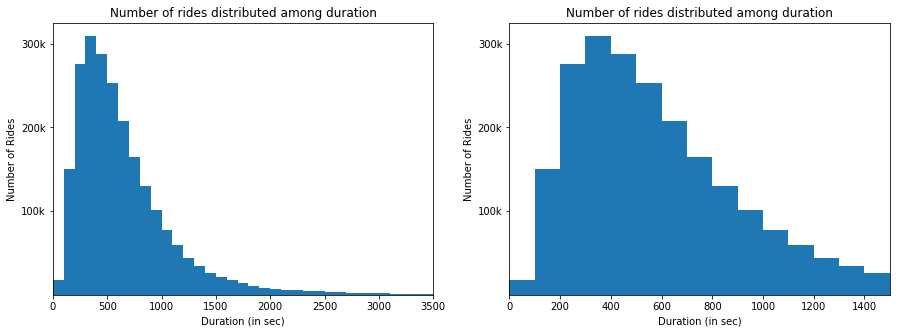

In [6]:
figure_size(15)
# histogram on left, example of too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, df_bike_clean['duration_sec'].max()+100, 100)
plt.hist(data = df_bike_clean, x = 'duration_sec', bins = bin_edges)
limit_x(3500)
plt.xlabel("Duration (in sec)")
plt.ylabel("Number of Rides")
plt.yticks([100000, 200000, 300000], ['100k','200k', '300k'])
plt.title("Number of rides distributed among duration")

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, df_bike_clean['duration_sec'].max()+100, 100)
plt.hist(data = df_bike_clean, x = 'duration_sec', bins = bin_edges)
limit_x(1500)
plt.xlabel("Duration (in sec)")
plt.ylabel("Number of Rides")
plt.yticks([100000, 200000, 300000], ['100k','200k', '300k'])

plt.title("Number of rides distributed among duration");

* First histogram shows that the data is very highly skewed
* Hence, for a better visual distribution in second histogram duration_sec max value is limited to 1500
* Majority of the rides lie between 200 - 700 second range (4-11 minutes)

### Monthly Series Analysis - Number of Rides Per Month. Has the business increased over time?

In [7]:
# extract month and year from start time
df_bike_clean['year_m'] = pd.to_datetime(df_bike_clean['start_time']).dt.to_period('M')

In [9]:
# seaborn blue color
base_color = sns.color_palette()[0]

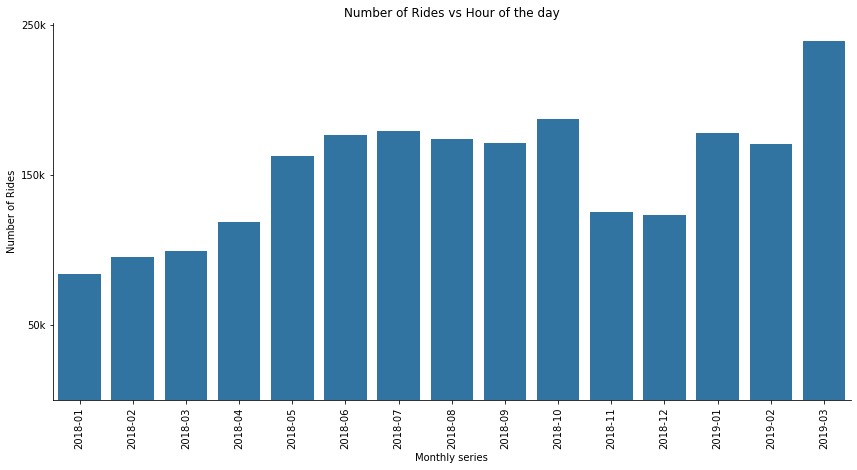

In [10]:
sns.catplot(x="year_m", kind="count", data=df_bike_clean, color=base_color,height=6,aspect=2)
plt.title("Number of Rides vs Hour of the day")
plt.xlabel('Monthly series')
plt.ylabel('Number of Rides')
plt.xticks(rotation = 90)
plt.yticks([50000, 150000, 250000], ['50k','150k','250k']);

* Significant increase in the number of rides in the first 3 months of year 2019 as compared to 2018
* Overall average of rides is greater in months from May to Oct, this might be because of pleasant weather

### At What time of the day most bikes were rented on Weekdays vs Weekends?

In [13]:
# change datatypes of time columns
df_bike_clean.start_time = pd.to_datetime(df_bike_clean.start_time)
df_bike_clean.end_time = pd.to_datetime(df_bike_clean.end_time)

In [14]:
# add column day of the week from start time
df_bike_clean['day_of_the_week']=df_bike_clean['start_time'].dt.strftime('%a')

In [17]:
# add column ride hour from start time
df_bike_clean['ride_hour']=df_bike_clean['start_time'].dt.hour

In [15]:
# differentiate between weekday and weekend
df_bike_clean['week_day_week_end']=df_bike_clean['day_of_the_week'].apply(lambda x: "Weekend" if (x =='Sat' or x =='Sun') 
                                                                          else "Weekday")

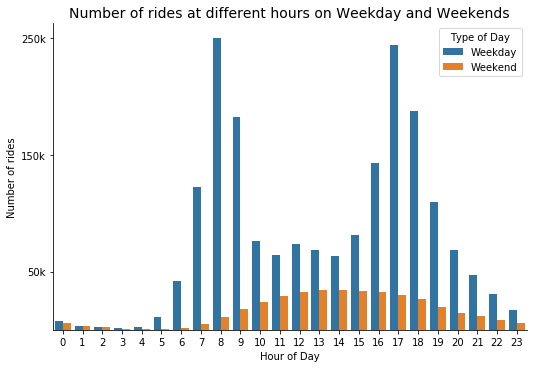

In [18]:
#plot counts by ride_hour on weekday and weekend
sns.catplot(x="ride_hour", kind="count", data=df_bike_clean,height=5,aspect=1.5, hue = 'week_day_week_end', legend= False)
plt.xlabel("Hour of Day")
plt.ylabel("Number of rides")
plt.title("Number of rides at different hours on Weekday and Weekends", fontsize=14)
plt.legend(title= "Type of Day")
# polishing the plot
plt.yticks([250000,50000, 150000], ['250k','50k','150k']);

* As seen in Univariate analysis, the distribution is `bimodal` but through bivariate plot it is clear that bimodal nature is only true for weekdays
* We can add an observation here that the bimodal nature of the hours might be due to the office hours(morning and evening)
* For weekends, it is normally distributed among hours with peak hour around 2 P.M.

### How does ride duration varies with user type?

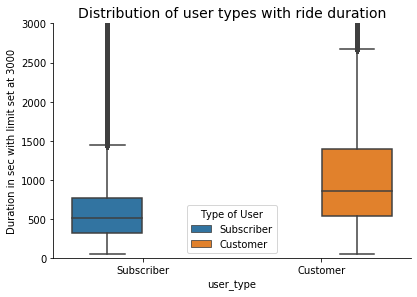

In [19]:
#plot counts by ride_hour on weekday and weekend
sns.catplot(x="user_type",y = 'duration_sec', kind="box", data=df_bike_clean,
            height=4,aspect=1.5, hue = 'user_type', legend= False)
limit_y(3000)
plt.ylabel("Duration in sec with limit set at 3000")
plt.title("Distribution of user types with ride duration", fontsize=14)
plt.legend(title= "Type of User");
# polishing the plot
#plt.yticks([250000,50000, 150000], ['250k','50k','150k']);

* `Subsribers` generally have shorter rides than `customers` with median of duration around 500 secs
* `Customers` have median of ride duration around 800 secs

### Number of rides for which a user shared ride among different User type

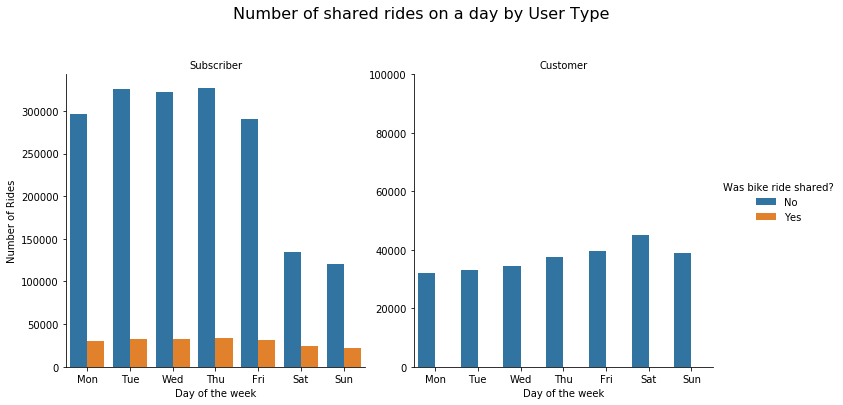

In [23]:
day_of_the_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df_bike_clean, x='day_of_the_week', col="user_type", hue='bike_share_for_all_trip',
            kind='count',order = day_of_the_week , sharey= False, legend=True)
limit_y(100000)
plt.suptitle('Number of shared rides on a day by User Type', size=16, y=1.12)
g.set_titles("{col_name}")
g._legend.set_title('Was bike ride shared?')
g.set_axis_labels("Day of the week", "Number of Rides");
#plt.yticks([20000,50000, 80000], ['20k','50k','80k']);

* Customers have `never` shared a ride
* Subscribers have a constant number of shared rides on weekdays, a little drop on weekends

## Summary

* Duration of majority of the rides lie between 200 - 700 seconds range (4-11 minutes)
* Significant increase in the number of rides in the first 3 months of year 2019 as compared to 2018
* Overall average of rides is greater in months from May to Oct, this might be because of pleasant weather
* For weekdays, number of rides has a bimodal distribution among hours, with hours at 8 A.M. and 5 P.M.
* For weekends, number of rides are normally distributed among hours with peak hour around 2 P.M.
* `Subsribers` generally have shorter rides than `customers` with median of duration around 500 secs
* `Customers` have median of ride duration around 800 secs
* Customers have `never` shared a ride
* Subscribers have a constant number of shared rides on weekdays, a little drop on weekends